# 使用预训练的模型做预测

除了用测试集验证模型效果外，同时还查看模型中各层的权重、偏置，预测数据时候各神经元的激活值

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

载入训练数据和测试数据，用于预测和验证效果

In [2]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

## 载入预训练的模型 Loading Models
The process for loading a model includes re-creating the model structure and loading the state dictionary into it.

In [3]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model_predict.pth"))
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)


### 查看模型中各层的权重和偏置

In [4]:

# 获取第一层隐藏的权重和偏置
first_hidden_layer_weights = model.linear_relu_stack[0].weight.data
first_hidden_layer_bias = model.linear_relu_stack[0].bias.data

# 获取第二隐藏层（实际上是第二个线性层，因为ReLU不是参数层）的权重和偏置
second_hidden_layer_weights = model.linear_relu_stack[2].weight.data
second_hidden_layer_bias = model.linear_relu_stack[2].bias.data

# 获取输出层的权重和偏置
output_layer_weights = model.linear_relu_stack[4].weight.data
output_layer_bias = model.linear_relu_stack[4].bias.data

# 打印权重和偏置
print("第一隐藏层权重：", first_hidden_layer_weights)
print("第一隐藏层偏置：", first_hidden_layer_bias)

print("第二隐藏层权重：", second_hidden_layer_weights)
print("第二隐藏层偏置：", second_hidden_layer_bias)

print("输出层权重：", output_layer_weights)
print("输出层偏置：", output_layer_bias)


第一隐藏层权重： tensor([[-0.0195,  0.0220, -0.0221,  ..., -0.0306,  0.0055,  0.0120],
        [-0.0280, -0.0122,  0.0229,  ..., -0.0307,  0.0062, -0.0096],
        [-0.0044, -0.0342,  0.0217,  ..., -0.0033, -0.0328,  0.0178],
        ...,
        [ 0.0209, -0.0292,  0.0077,  ..., -0.0334,  0.0252,  0.0041],
        [ 0.0046,  0.0154,  0.0139,  ...,  0.0330,  0.0071, -0.0024],
        [-0.0209,  0.0154, -0.0035,  ..., -0.0239, -0.0010, -0.0057]])
第一隐藏层偏置： tensor([ 0.0296,  0.0425,  0.0893,  0.0680,  0.0476, -0.0102, -0.0141,  0.0039,
         0.1179, -0.0051, -0.0063,  0.1402,  0.0305,  0.0803, -0.1300, -0.0338,
         0.0416,  0.0299, -0.0043,  0.0756,  0.0449,  0.0931, -0.0292,  0.1133,
         0.0456,  0.0377, -0.0042,  0.0035,  0.0477,  0.0054, -0.0119, -0.0474,
         0.1227,  0.1388, -0.0281,  0.0813,  0.0178,  0.0552,  0.0490,  0.0072,
        -0.0164,  0.0316, -0.0669,  0.1000,  0.0881,  0.0919, -0.0064, -0.0218,
         0.0813,  0.0588,  0.0158, -0.0199,  0.0130, -0.0466,  0.010

## 模型现在可以用来做预测，载入测试集中，随选 3*5 个样本，观察一下预测值和实际值是否相符。 

This model can now be used to make predictions.

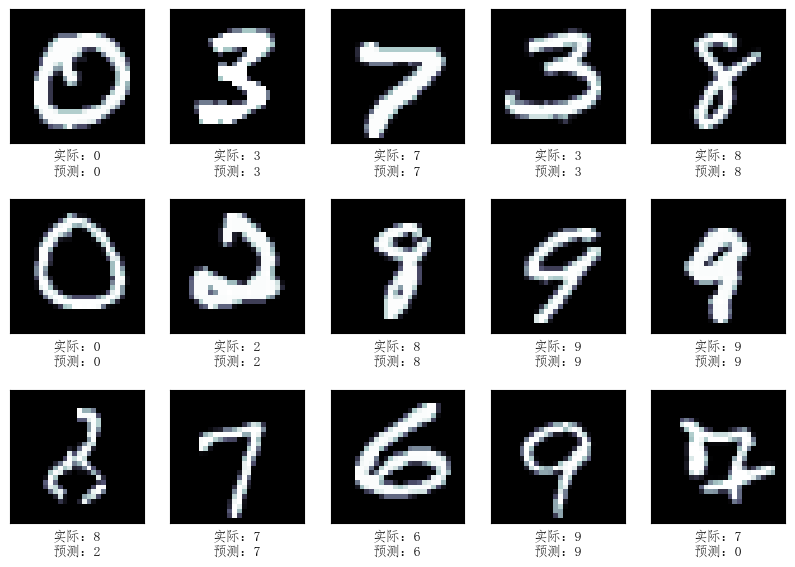

In [5]:
model.eval()

with torch.no_grad():
    fig, ax = plt.subplots(3, 5, figsize=(10, 7))  # 创建一个3行5列的画布
    for i, axi in enumerate(ax.flat):
        t = int(torch.randint(low=0, high=10000, size=(1, 1))[0][0])  # 生成随机整数t作为测试集的下标，可随机选取测试集中的图片
        x, y = test_data[t][0], test_data[t][1]
        x = x.to(device)
        pred = model(x)
        pred = model(x)
        predicted, actual = pred[0].argmax(0), y
        axi.imshow(x.reshape(28, 28), cmap="bone")  # 绘制图像
        axi.set(xticks=[], yticks=[])
        axi.set_xlabel(f"实际：{actual}\n预测：{predicted}")
    plt.rcParams["font.sans-serif"] = "FangSong"
    plt.show()

用数据集中的第一个样本预测一下，看看预测后，各层各神经元的激活值

In [6]:
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = pred[0].argmax(0), y
    print(f'预测值: "{predicted}", 实际值: "{actual}"')

预测值: "7", 实际值: "7"


In [7]:
activation_values = []
# 定义一个函数来获取并存储 激活值
def get_activations(model, x):
    for name, module in model.named_modules():
        # print(f"name: {name}, module: {module}")
        if isinstance(module, nn.Linear):  # 若模块是线性层（全连接层）
            x = module(x)
            activation_values.append(x.detach().numpy())  # 存储激活值
            x = torch.relu(x)  # 假设使用ReLU激活函数
# 调用函数进行前向传播并收集激活值
get_activations(model, x.reshape(-1))

# 输出隐藏层的激活值
for i, activation in enumerate(activation_values):
    print(f"第{i}层的激活值:")
    print(activation)

第0层的激活值:
[ 0.46497762  1.8669338  -0.9129058   1.2389984   2.2626479   0.07512591
 -0.38309968  0.54399186  1.4423015   0.536261    1.9764924   1.5057961
  0.23844558  0.38114756  0.40221643  0.46987668  0.27146715  1.274637
 -0.49883738  0.24865481  0.79552007  1.075719    0.7903518   1.2697514
  1.852175   -1.1983551  -0.16103308  1.8612244   0.05633884  0.5130293
  1.3756769   2.2858562   1.0699114   1.1052482   0.5681926   0.7645401
 -0.39304185 -0.6281291   0.8571925   1.2891697   0.22259882 -0.06213266
  1.3097606   0.4480669   1.6160623   0.85603905  2.4784517   1.2688293
  1.36515     0.3124885   1.6299437  -0.1479131   0.8402942   0.8894825
  2.7024019   1.1377822  -0.46651977  0.8129088   0.43705362 -0.15855323
  1.9431658  -0.24175374  0.06677328  0.03472799]
第1层的激活值:
[ 0.48188904 -1.0580878   3.2078369   2.501559    0.49949443  0.8256546
 -0.43552938 -1.1672809   0.11953129  2.1901674   1.0923786   3.5640512
 -0.8554372   1.7905514   1.5281311   3.458475    0.941286   -1.01